<a href="https://colab.research.google.com/github/thiagoteles10/previsao-do-preco-de-pizza-machine-learning-/blob/main/ML(previs%C3%A3o_de_pre%C3%A7o_de_pizza).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
#!pip install lazypredict

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from lazypredict.Supervised import LazyRegressor
sns.set_theme(color_codes=True)


In [99]:
df= pd.read_csv('pizza_v1.csv')

In [100]:
df.head(3)

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.00,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.00,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.00,mushrooms,double_signature,reguler,yes,yes


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    object 
 1   price_rupiah  129 non-null    object 
 2   diameter      129 non-null    float64
 3   topping       129 non-null    object 
 4   variant       129 non-null    object 
 5   size          129 non-null    object 
 6   extra_sauce   129 non-null    object 
 7   extra_cheese  129 non-null    object 
dtypes: float64(1), object(7)
memory usage: 8.2+ KB


In [102]:
df.duplicated().sum()

3

In [103]:
# fazendo a substituição de caracteres por espaços vazios
df['price_rupiah'] = df['price_rupiah'].str.replace('Rp', '').str.replace(',','')

# convertendo de object para float
df['price_rupiah'] = df['price_rupiah'].astype(float)

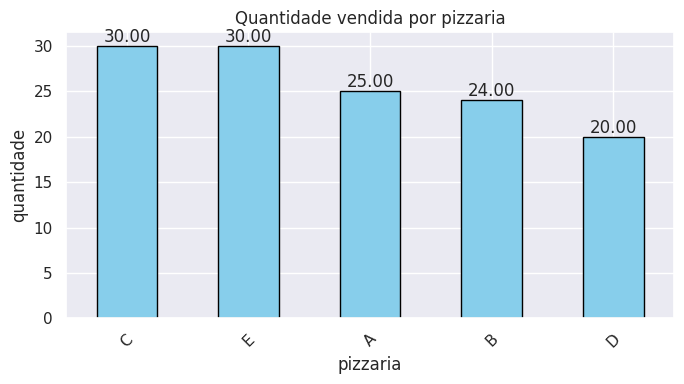

In [104]:
plt.figure(figsize=(7, 4))

# Distribuição das pizzas vendidas por empresa
pizza_distribution = df['company'].value_counts()
pizza_distribution.plot(kind='bar', color='skyblue', edgecolor='black')

#adicionando valores acima da barra
for index, value in enumerate(pizza_distribution.sort_values(ascending=False)):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.title('Quantidade vendida por pizzaria')
plt.xlabel('pizzaria')
plt.ylabel('quantidade')
plt.xticks(rotation=45)
plt.tight_layout()

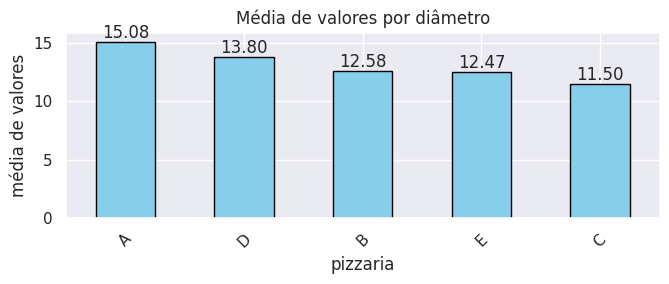

In [105]:
plt.figure(figsize=(7, 3))
preco_diam_company = df.groupby('company')['diameter'].mean()

# ordena os valores em ordem decrescente e gera o gráfico
preco_diam_company.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')

#adicionando valores acima da barra
for index, value in enumerate(preco_diam_company.sort_values(ascending=False)):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.title('Média de valores por diâmetro')
plt.xlabel('pizzaria')
plt.ylabel('média de valores')
plt.xticks(rotation=45)
plt.tight_layout()

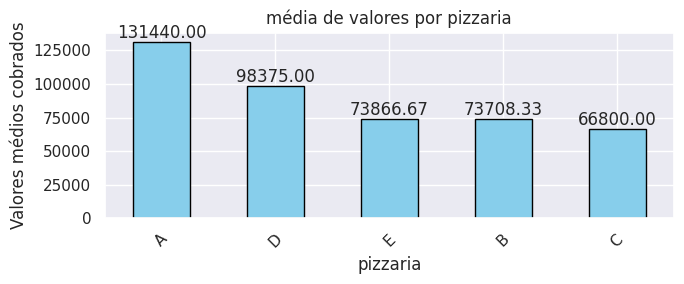

In [106]:
plt.figure(figsize=(7, 3))

preco_medio_company = df.groupby('company')['price_rupiah'].mean()

# Ordena os valores pela média e gera o gráfico de barras
preco_medio_company.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')

# Adiciona os valores acima das barras
for index, value in enumerate(preco_medio_company.sort_values(ascending=False)):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.title('média de valores por pizzaria')
plt.xlabel('pizzaria')
plt.ylabel('Valores médios cobrados')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [107]:
# utilizando uma função para separar as pizzas por tipo
def segment_variant(variant):
    if 'veggie' in variant:
        return 'pizza vegana'
    elif 'meat' in variant or 'BBQ' in variant:
        return 'pizza de carne'
    elif 'tuna' in variant:
        return 'pizza de atum'
    else:
        return 'outros sabores '

# aplicando a função na coluna 'variant' para separar as pizzas.
df['variant'] = df['variant'].apply(segment_variant)


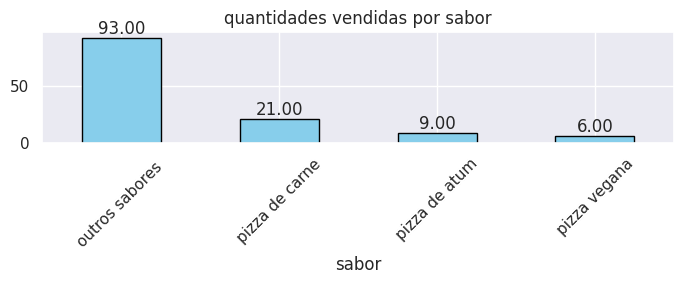

In [108]:
plt.figure(figsize=(7, 3))

vendas_sabor = df['variant'].value_counts()

# Ordena as quantidades por sabor e gera o gráfico de barras
vendas_sabor.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')

# Adiciona os valores acima das barras
for index, value in enumerate(vendas_sabor.sort_values(ascending=False)):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.title('quantidades vendidas por sabor')
plt.xlabel('sabor')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

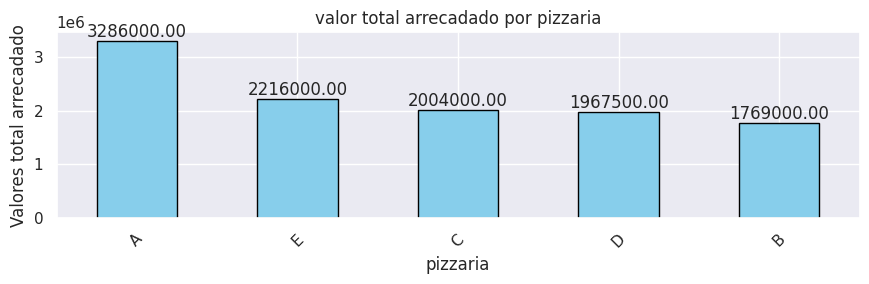

In [109]:
plt.figure(figsize=(9, 3))

valor_total_pizzaria = df.groupby('company')['price_rupiah'].sum()

# faz a soma dos valores totais de cada pizzaria e gera o gráfico de barras
valor_total_pizzaria.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')

# Adiciona os valores acima das barras
for index, value in enumerate(valor_total_pizzaria.sort_values(ascending=False)):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.title('valor total arrecadado por pizzaria')
plt.xlabel('pizzaria')
plt.ylabel('Valores total arrecadado')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

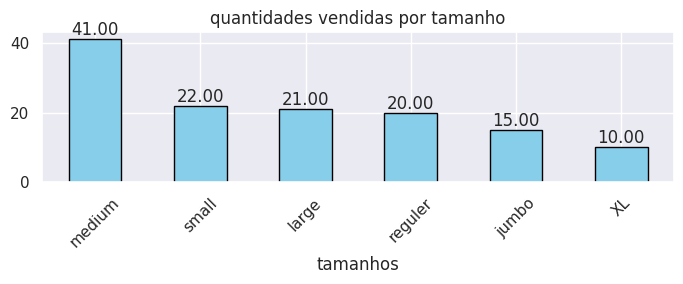

In [110]:
plt.figure(figsize=(7, 3))

vendas_tamanho = df['size'].value_counts()

# Ordena as quantidades por tamanho e gera o gráfico de barras
vendas_tamanho.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')

# Adiciona os valores acima das barras
for index, value in enumerate(vendas_tamanho.sort_values(ascending=False)):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.title('quantidades vendidas por tamanho')
plt.xlabel('tamanhos')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [111]:
# Comparar a distribuição dos tamanhos de pizza entre as pizzariass
size_distribution_by_company = df.groupby(['company', 'size']).size().unstack(fill_value=0)


<Figure size 1400x600 with 0 Axes>

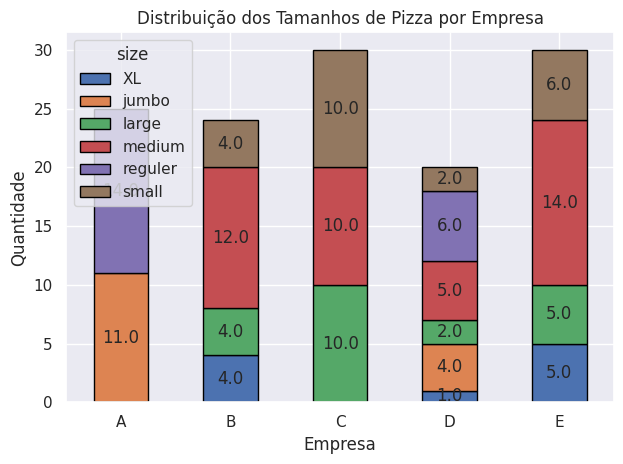

In [112]:


plt.figure(figsize=(14, 6))

# Vamos assumir que você possui um DataFrame chamado 'size_distribution_by_company' contendo os dados da distribuição dos tamanhos de pizza por empresa.

# Plotar a distribuição dos tamanhos de pizza entre as empresas em um gráfico de barras
ax = size_distribution_by_company.plot(kind='bar', stacked=True, edgecolor='black')

# Adicionar os valores dentro de cada barra (ignorando os valores iguais a zero)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center')

plt.title('Distribuição dos Tamanhos de Pizza por Empresa')
plt.xlabel('Empresa')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()


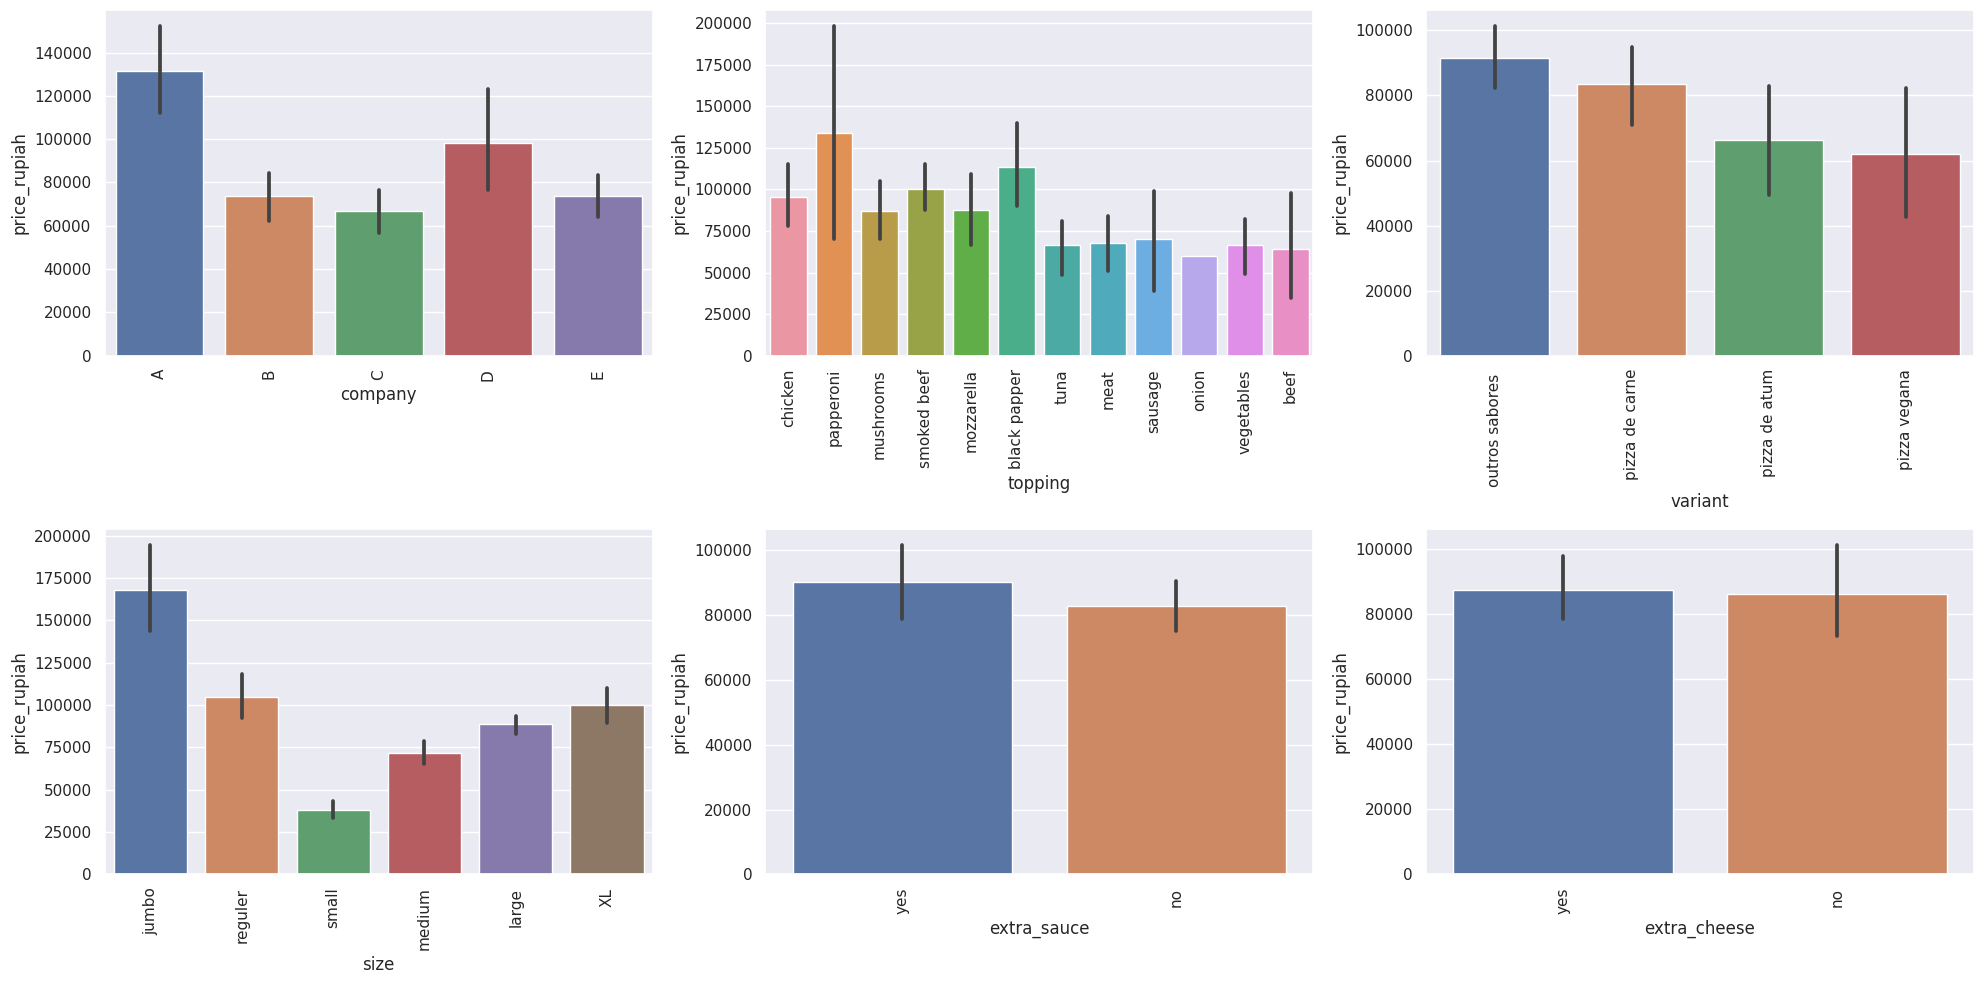

In [113]:
# plotando as variáveis categóricas
cat_vars = ['company', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese']

# criando uma figura com os subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.ravel()

# criando um barplot para cada variável categórica
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='price_rupiah', data=df, ax=axs[i], estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)


fig.tight_layout()

# show plot
plt.show()

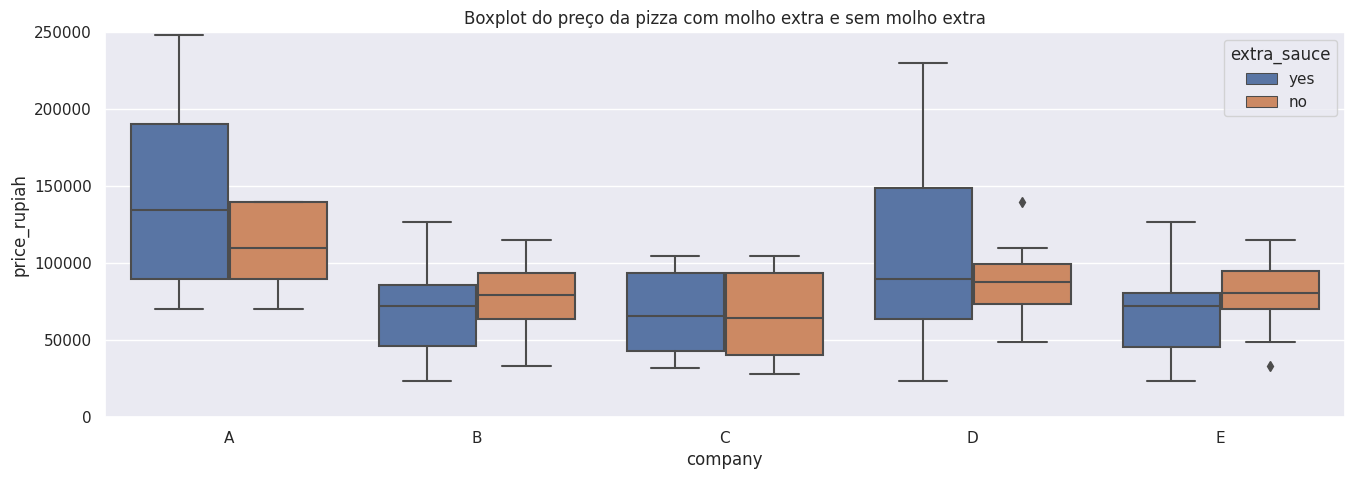

In [123]:

plt.figure(figsize=(16, 5))
sns.boxplot(x='company', y='price_rupiah', data=df, hue='extra_sauce')
plt.title('Boxplot do preço da pizza com molho extra e sem molho extra')
plt.ylim(0, 250000)
plt.show()

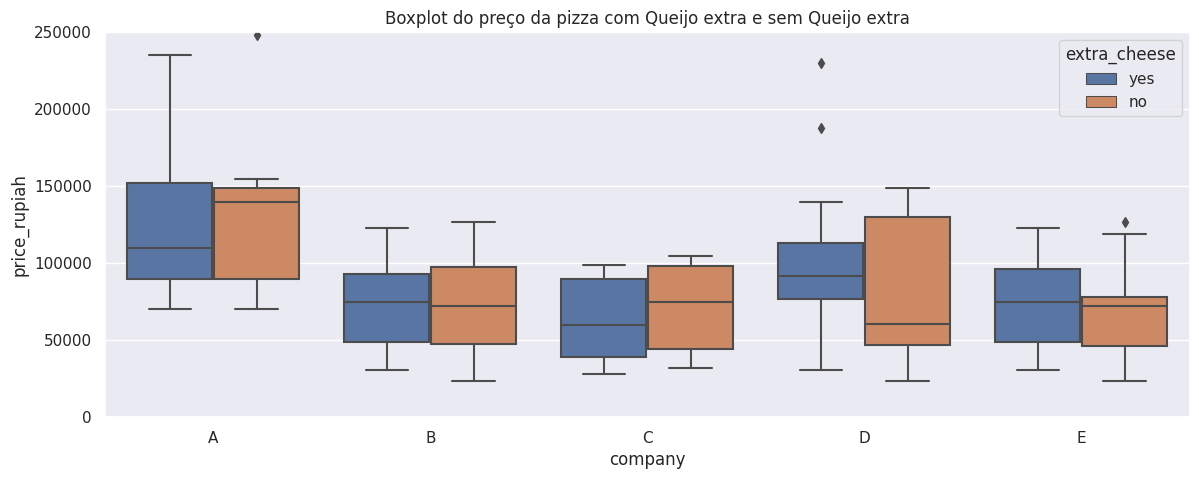

In [115]:
plt.figure(figsize=(14, 5))
sns.boxplot(x='company', y='price_rupiah', data=df, hue='extra_cheese')
plt.title('Boxplot do preço da pizza com Queijo extra e sem Queijo extra')
plt.ylim(0, 250000)
plt.show()

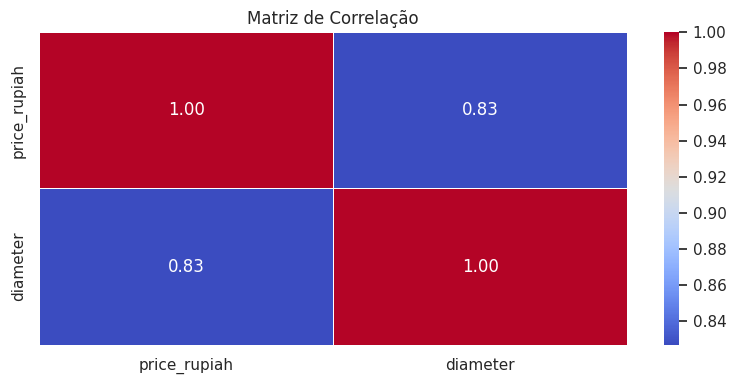

In [116]:
# plotando a correlação entre o diâmetro e o preço
correlation_matrix = df.corr()

# Plotar a matriz de correlação em um heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.tight_layout()
plt.show()

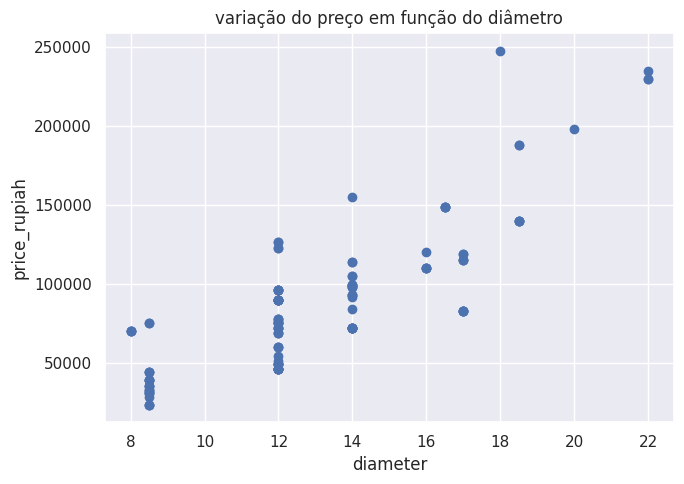

In [117]:
# confirmando a correlação entre entre preço e diâmetro
plt.figure(figsize=(7,5))
plt.scatter(df['diameter'],df['price_rupiah'])
plt.title('variação do preço em função do diâmetro')
plt.ylabel('price_rupiah')
plt.xlabel('diameter')
plt.tight_layout()
plt.show()

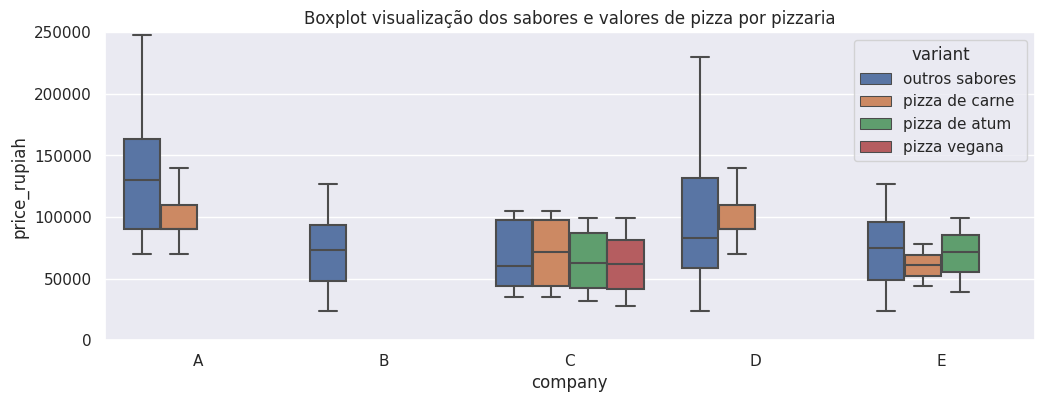

In [118]:
plt.figure(figsize=(12, 4))
sns.boxplot(x='company', y='price_rupiah', data=df, hue='variant')
plt.title('Boxplot visualização dos sabores e valores de pizza por pizzaria')
plt.ylim(0, 250000)
plt.show()

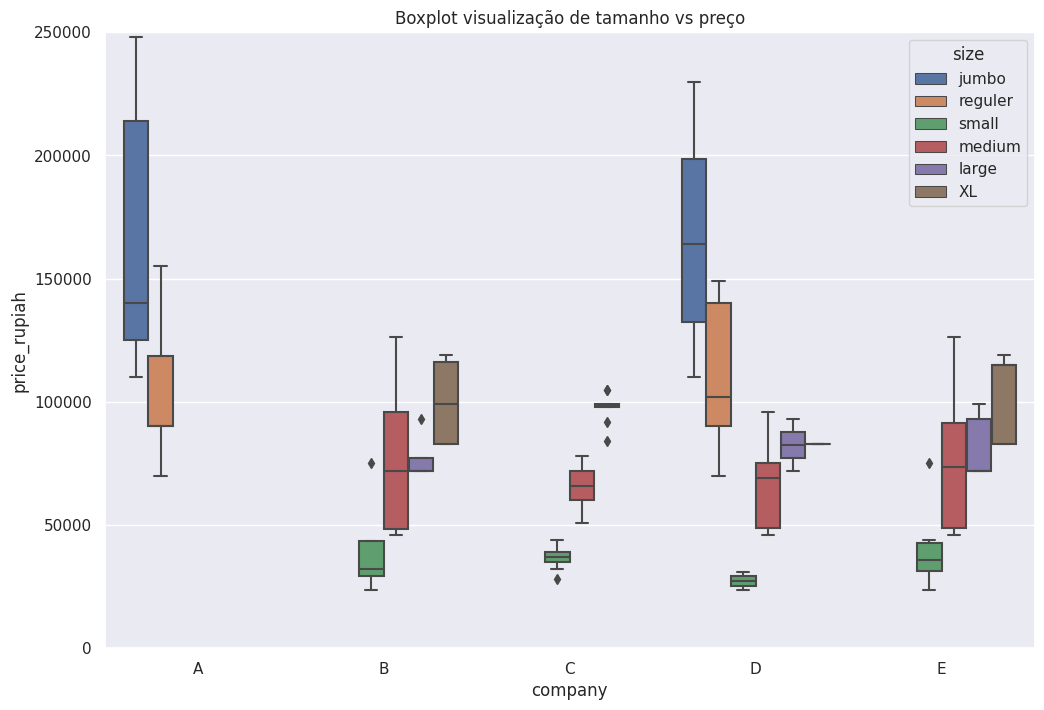

In [92]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='company', y='price_rupiah', data=df, hue='size')
plt.title('Boxplot visualização de tamanho vs preço')
plt.ylim(0, 250000)
plt.show()

####################################

## Machine learning

In [93]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error


In [94]:
# Carregue seus dados em um DataFrame do pandas (por exemplo, df)
df1 = pd.read_csv('pizza_v1.csv')

In [95]:
df1['price_rupiah'] = df1['price_rupiah'].str.replace('Rp', '').str.replace(',','').astype(float)

# 2. Separar as features (variáveis independentes) e o target (variável dependente)
X = df1.drop('price_rupiah', axis=1)
y = df1['price_rupiah']

# 3. Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Criar o pré-processador das features
numeric_features = ['diameter']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = ['company', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# 5. Criar o pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),                # Pré-processamento das features
    ('feature_selector', SelectKBest()),           # Seleção das melhores features
    ('regressor', RandomForestRegressor())         # Regressor (Random Forest neste exemplo)
])

# 6. Treinar o pipeline no conjunto de treinamento
pipeline.fit(X_train, y_train)

# avaliar modelo no conjunto de treino
train_score = pipeline.score(X_train, y_train)

# avaliar modelo no conjunto de teste
test_score = pipeline.score(X_test, y_test)

# 7. Fazer previsões no conjunto de teste
y_pred = pipeline.predict(X_test)

# Print the train and test scores
print('Train score:', train_score)
print('Test score:', test_score)
print('\n')

# 8. Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5

print("Erro Quadrático Médio (MSE):", mse)
print("Erro Absoluto Médio (MAE):", mae)
print("Coeficiente de Determinação (R²):", r2)
print("Erro Quadrático Médio Logarítmico (MSLE):", msle)
print('média Absoluta dos erros quadráticos:', rmse)

Train score: 0.9007516758598111
Test score: 0.8591201295267845


Erro Quadrático Médio (MSE): 430556578.4996584
Erro Absoluto Médio (MAE): 12736.090156298684
Coeficiente de Determinação (R²): 0.8591201295267845
Erro Quadrático Médio Logarítmico (MSLE): 0.05457270130482586
média Absoluta dos erros quadráticos: 20749.857312754186


#######################################################3

Train score: 0.9007516758598111
Test score: 0.8591201295267845




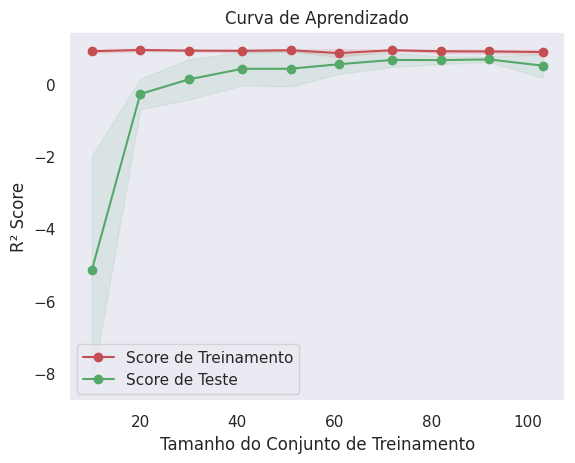

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# ...

# 6. Treinar o pipeline no conjunto de treinamento
pipeline.fit(X_train, y_train)

# 7. Fazer previsões no conjunto de teste
y_pred = pipeline.predict(X_test)

# Print the train and test scores
print('Train score:', train_score)
print('Test score:', test_score)
print('\n')


# Plotar as curvas de aprendizado
train_sizes, train_scores, test_scores = learning_curve(pipeline, X, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Curva de Aprendizado")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("R² Score")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score de Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de Teste")
plt.legend(loc="best")
plt.show()
